In [1]:
import pandas as pd
from glob import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def mdisplay(df):
    with pd.option_context('display.max_columns', None):
        display(df)

### Merging 12 months of sales data into a single file

In [3]:
folderpath = './SalesAnalysis/Sales_Data'
filenames = glob(folderpath + '/*')
keys = []
dfs = []
for x in filenames:
    temp = pd.read_csv(x)
    temp[['Price Each', 'Quantity Ordered']] = temp[['Price Each', 'Quantity Ordered']].apply(pd.to_numeric, errors = 'coerce')
    temp = temp.dropna().reset_index(drop = True)
    dfs.append(temp)
    result = re.search("_([a-zA-Z]*)_", x)
    keys.append(result.group(1))
concatenated = pd.concat(dfs, keys = keys)
concatenated['Order Date'] = pd.to_datetime(concatenated['Order Date'])
mdisplay(concatenated)

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each          Order Date  \
April     0           11.95 2019-04-19 08:46:00   
          1           99.99 2019-04-07 22:30:00   
          2          600.00 2019-04-12 14:38:00   
          3           11.99 2019-04-12 14:38:00   
          4           11.99 2019-04-30 09:27:00   
...                     ...                 ...   
September 11624        2.99 2019-09-17 20:56:00   
          11625      700.00 2019-09-01 16:00:00   
          11626      700.00 2019-09-23 07:39:00   
          11627      379.99 2019-09-19 17:30:00   
          11628       11.95 2019-09-30 00:18:00   

                                        Purchase Address  
April     0                 917 1st St, Dallas, TX 75001  
          1            682 Chestnut St, Boston, MA 02215  
          2         669 Spruce St, Los Angeles, CA 90001  
          3         669 Spruce St, Los Angeles, CA 90001  
          4            333 8th St, Los Angeles, CA 90001  
...                                                  ...  
September 11624   840 Highland St, Los Angeles, CA 90001  
          11625  216 Dogwood St, San Francisco, CA 94016  
          11626     220 12th St, San Francisco, CA 94016  
          11627   511 Forest St, San Francisco, CA 94016  
          11628   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 6 columns]

In [4]:
data = concatenated.copy()
data.index.levels[0]
data

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each          Order Date  \
April     0           11.95 2019-04-19 08:46:00   
          1           99.99 2019-04-07 22:30:00   
          2          600.00 2019-04-12 14:38:00   
          3           11.99 2019-04-12 14:38:00   
          4           11.99 2019-04-30 09:27:00   
...                     ...                 ...   
September 11624        2.99 2019-09-17 20:56:00   
          11625      700.00 2019-09-01 16:00:00   
          11626      700.00 2019-09-23 07:39:00   
          11627      379.99 2019-09-19 17:30:00   
          11628       11.95 2019-09-30 00:18:00   

                                        Purchase Address  
April     0                 917 1st St, Dallas, TX 75001  
          1            682 Chestnut St, Boston, MA 02215  
          2         669 Spruce St, Los Angeles, CA 90001  
          3         669 Spruce St, Los Angeles, CA 90001  
          4            333 8th St, Los Angeles, CA 90001  
...                                                  ...  
September 11624   840 Highland St, Los Angeles, CA 90001  
          11625  216 Dogwood St, San Francisco, CA 94016  
          11626     220 12th St, San Francisco, CA 94016  
          11627   511 Forest St, San Francisco, CA 94016  
          11628   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 6 columns]

In [5]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
temp = concatenated.copy()
# temp.index = temp.index.set_levels(pd.CategoricalIndex(temp.index.levels[0].values, categories = months, ordered = True), level = 0)
# temp = temp.sort_index(level = 0)
temp = temp.reset_index(level = 0).rename(columns = {'level_0':'Months'})
temp['Months'] = pd.Categorical(temp['Months'], categories = months, ordered = True)
temp = temp.sort_values(by = 'Months')
temp
# Method 1
# temp = temp.set_index('Months', append = True).rename_axis(index = {None:'Idx'})
# temp.swaplevel('Idx', 'Months', axis = 0)
#OR
temp = temp.set_index('Months', append = True).swaplevel(0,1,axis = 0)
temp

# Method 2
# old_idx = temp.index.to_frame()
# old_idx.insert(0, 'Months',temp['Months'])
# temp.index = pd.MultiIndex.from_frame(old_idx)
# temp.drop(columns = 'Months')

Order ID                     Product  Quantity Ordered  \
Months                                                                  
January  1845    143000        USB-C Charging Cable               1.0   
         3229    144318        USB-C Charging Cable               1.0   
         3228    144317            Wired Headphones               1.0   
         3227    144316    Lightning Charging Cable               1.0   
         3226    144315               Flatscreen TV               1.0   
...                 ...                         ...               ...   
December 16664   311672  Bose SoundSport Headphones               1.0   
         16665   311673        USB-C Charging Cable               1.0   
         16666   311674      AAA Batteries (4-pack)               3.0   
         16644   311655      27in 4K Gaming Monitor               1.0   
         13031   308171       AA Batteries (4-pack)               1.0   

                Price Each          Order Date  \
Months                                           
January  1845        11.95 2019-01-27 20:47:00   
         3229        11.95 2019-01-20 16:46:00   
         3228        11.99 2019-01-18 17:08:00   
         3227        14.95 2019-01-29 16:05:00   
         3226       300.00 2019-01-28 18:33:00   
...                    ...                 ...   
December 16664       99.99 2019-12-02 16:16:00   
         16665       11.95 2019-12-26 22:24:00   
         16666        2.99 2019-12-28 15:19:00   
         16644      389.99 2019-12-07 11:29:00   
         13031        3.84 2019-12-03 18:59:00   

                                      Purchase Address  
Months                                                  
January  1845      97 Lake St, San Francisco, CA 94016  
         3229       490 Chestnut St, Atlanta, GA 30301  
         3228      335 6th St, San Francisco, CA 94016  
         3227    909 Cedar St, San Francisco, CA 94016  
         3226          9 Johnson St, Atlanta, GA 30301  
...                                                ...  
December 16664     400 1st St, San Francisco, CA 94016  
         16665  169 Forest St, San Francisco, CA 94016  
         16666        682 Maple St, Portland, OR 97035  
         16644       219 Madison St, Atlanta, GA 30301  
         13031    655 Main St, San Francisco, CA 94016  

[185950 rows x 6 columns]

### Finding which month was the best for sales

In [6]:
data.insert(4,'Total Price',data['Quantity Ordered'] * data['Price Each'])
# data = data.reindex(months, level = 0)
mdisplay(data)

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each  Total Price          Order Date  \
April     0           11.95        23.90 2019-04-19 08:46:00   
          1           99.99        99.99 2019-04-07 22:30:00   
          2          600.00       600.00 2019-04-12 14:38:00   
          3           11.99        11.99 2019-04-12 14:38:00   
          4           11.99        11.99 2019-04-30 09:27:00   
...                     ...          ...                 ...   
September 11624        2.99         8.97 2019-09-17 20:56:00   
          11625      700.00       700.00 2019-09-01 16:00:00   
          11626      700.00       700.00 2019-09-23 07:39:00   
          11627      379.99       379.99 2019-09-19 17:30:00   
          11628       11.95        11.95 2019-09-30 00:18:00   

                                        Purchase Address  
April     0                 917 1st St, Dallas, TX 75001  
          1            682 Chestnut St, Boston, MA 02215  
          2         669 Spruce St, Los Angeles, CA 90001  
          3         669 Spruce St, Los Angeles, CA 90001  
          4            333 8th St, Los Angeles, CA 90001  
...                                                  ...  
September 11624   840 Highland St, Los Angeles, CA 90001  
          11625  216 Dogwood St, San Francisco, CA 94016  
          11626     220 12th St, San Francisco, CA 94016  
          11627   511 Forest St, San Francisco, CA 94016  
          11628   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 7 columns]

In [7]:
req_stats = data['Total Price'].groupby(level = 0, sort = False).sum()#.sort_values(ascending = False)
# req_month = req_stats.index[0]
display(req_stats)
# print('Highest sales were in the month of',req_month,' Sales -', req_stats[req_month])

April        3396059.11
August       2244412.31
December     4619297.12
February     2203481.24
January      1815335.12
July         2646899.69
June         2578293.30
March        2809063.30
May          3144584.80
November     3198909.23
October      3736884.05
September    2098816.70
Name: Total Price, dtype: float64

Text(0, 0.5, 'Sales (x 10^6)')

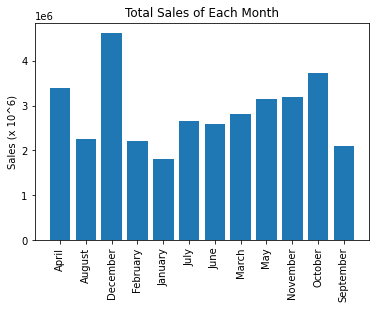

In [8]:
plt.bar(x = req_stats.index, height = req_stats.values)
_=plt.xticks(rotation = 90)
plt.title('Total Sales of Each Month')
plt.ylabel('Sales (x 10^6)')

### Finding which city had max sales

In [9]:
data['City'] = 'x'
data['City'] = data['Purchase Address'].apply(lambda x : f"{re.search(', ([A-Za-z ]*),', x).group(1)} ({re.findall(', ([A-Z]*)', x)[1]})")
data

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each  Total Price          Order Date  \
April     0           11.95        23.90 2019-04-19 08:46:00   
          1           99.99        99.99 2019-04-07 22:30:00   
          2          600.00       600.00 2019-04-12 14:38:00   
          3           11.99        11.99 2019-04-12 14:38:00   
          4           11.99        11.99 2019-04-30 09:27:00   
...                     ...          ...                 ...   
September 11624        2.99         8.97 2019-09-17 20:56:00   
          11625      700.00       700.00 2019-09-01 16:00:00   
          11626      700.00       700.00 2019-09-23 07:39:00   
          11627      379.99       379.99 2019-09-19 17:30:00   
          11628       11.95        11.95 2019-09-30 00:18:00   

                                        Purchase Address                City  
April     0                 917 1st St, Dallas, TX 75001         Dallas (TX)  
          1            682 Chestnut St, Boston, MA 02215         Boston (MA)  
          2         669 Spruce St, Los Angeles, CA 90001    Los Angeles (CA)  
          3         669 Spruce St, Los Angeles, CA 90001    Los Angeles (CA)  
          4            333 8th St, Los Angeles, CA 90001    Los Angeles (CA)  
...                                                  ...                 ...  
September 11624   840 Highland St, Los Angeles, CA 90001    Los Angeles (CA)  
          11625  216 Dogwood St, San Francisco, CA 94016  San Francisco (CA)  
          11626     220 12th St, San Francisco, CA 94016  San Francisco (CA)  
          11627   511 Forest St, San Francisco, CA 94016  San Francisco (CA)  
          11628   250 Meadow St, San Francisco, CA 94016  San Francisco (CA)  

[185950 rows x 8 columns]

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Total Price, dtype: float64


Text(0.5, 1.0, 'City wise sale')

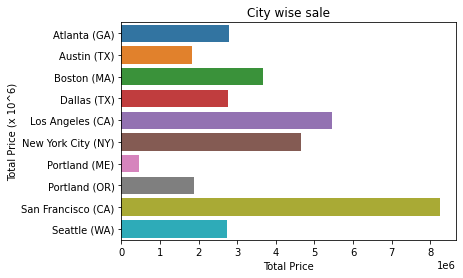

In [10]:
city_wise = data.groupby(by = 'City').sum()['Total Price']
print(city_wise)
sns.barplot(y = city_wise.index, x = city_wise)
plt.ylabel('Total Price (x 10^6)')
plt.title('City wise sale')

In [11]:
data2 = data.copy()
data2 = data2.reindex(index = months, level = 0)
data2['hour'] = data['Order Date'].dt.hour
data2 = data2.reset_index(level=0).rename(columns = {'level_0':'month'})
data2 = data2.groupby(by = ['month','hour'], sort = False).count()['Product']
data2 = data2.reset_index()
data2['hour'] = data2['hour'].apply(lambda x : (x//3)*3)
data2

,month,hour,Product
0,January,21,576
1,January,12,542
2,January,12,607
3,January,18,620
4,January,9,655
...,...,...,...
283,December,6,833
284,December,3,114
285,December,3,191
286,December,0,155


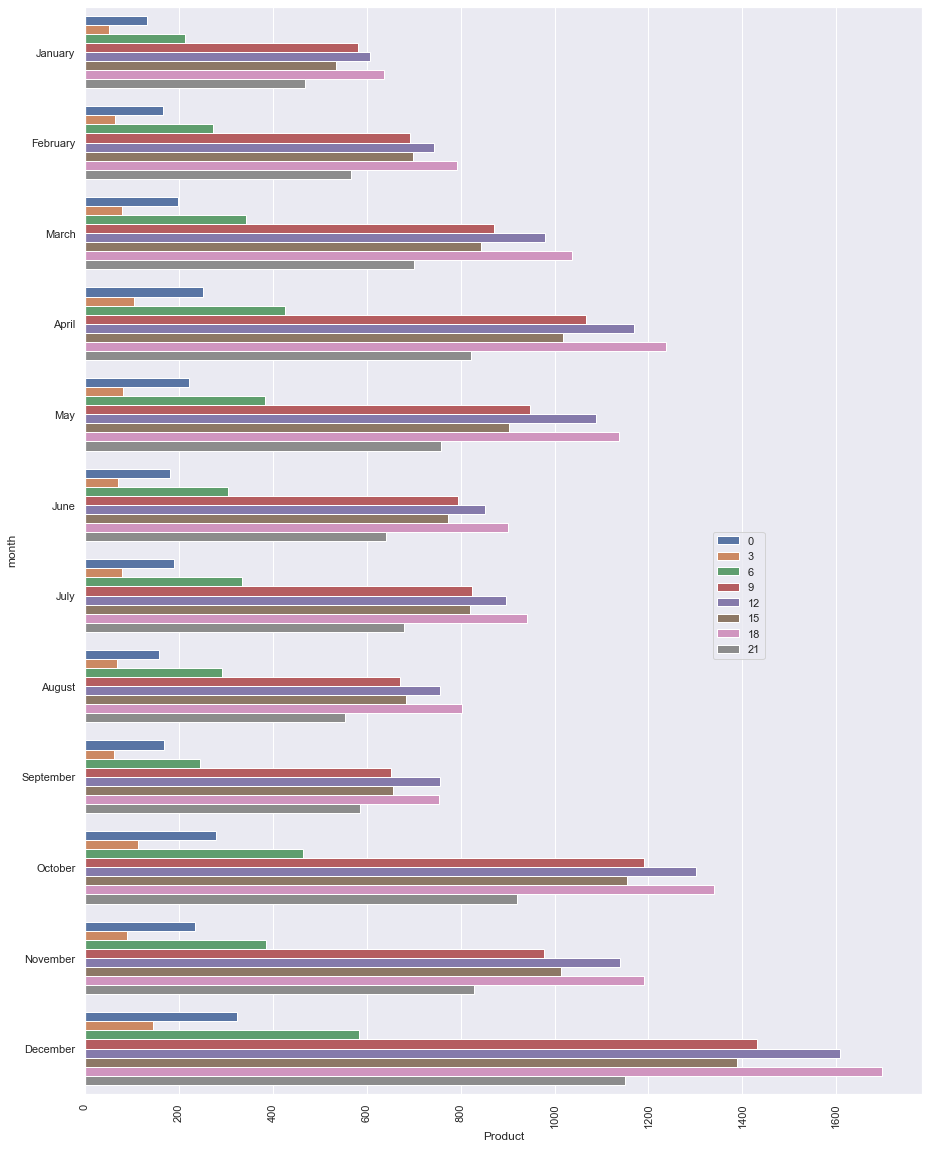

In [14]:
sns.barplot(data = data2, y = 'month', x = 'Product', hue = 'hour', ci = 0)
plt.xticks(rotation = 90)
plt.legend(loc = (0.75,0.4))
sns.set(rc = {'figure.figsize':(15,20)})